# Denison CS-181/DA-210 Homework

---

## Phase 3: Data Exploration

For phase 3 of the mid-semester project, we build off of the set of tidy data tables we exported in the first two phases, and deepen our understanding, by doing some preliminary and guided exploration of our data.

Note that this notebook is the third required deliverable of this project, and should be turned in with the rest of your work.

### Plotting Software Installation

**This notebook relies on `matplotlib`, which must be installed.**

This can be accomplished most easily from a Terminal window, where you simply type:

```
conda install matplotlib
```
and accept the set of packages to be added to your anaconda environment.

In [5]:
import os
import sys
import lxml
from lxml import etree
import pandas as pd
import matplotlib.pyplot as pyplot

def add_modules():
    """
    Starting at the current directory and proceeding up the file system
    tree, search for a directory named `modules`.  If found, and if not
    already there, add to the Python module search path.
    
    Params: None
    
    Return: None
    """
    directory = "."
    levels = 0
    while not os.path.isdir(os.path.join(directory, "modules")) and \
          levels < 5:
        directory = os.path.join(directory, "..")
        levels += 1
    module_path = os.path.abspath(os.path.join(directory, "modules"))
    if os.path.isdir(module_path):
        if not module_path in sys.path:
            sys.path.append(module_path)

add_modules()
import util

datadir = util.resolve_dir("moviedata")
assert datadir is not None

### Part 1: Actors Popularity Histogram

Say we are interested in analyzing the distribution of popularity values for our sample of actors. One way we can accomplish this is to create a histogram. The next few cells will present a step by step process towards building a histogram of popularity values for our set of actors.

A histogram provides an approximate representation of the distribution of a set of values, by taking numerical values from a list, and counting the number of instances where the values fall into certain range, called **bins**.

To perform this calculation, we first need to know the minimum value, maximum value, and the difference between said max and min, called the **range** of the values.

**Step 1** Import `actors.csv` into Python as a DataFrame using `pandas`. Project the values of the popularity column as a list (not a Series) and save the result to a variable named `popularity_values`. Then, find the maximum value, minimum value, and range, assigning the results to `value_max`, `value_min`, and `value_range`, respectively.

In [6]:
# Solution cell

actors = pd.read_csv(os.path.join(datadir, "actors.csv"))
popularity_values = actors['popularity'].tolist()
value_max = max(popularity_values)
value_min = min(popularity_values)
value_range = value_max - value_min

print("Value max:", value_max)
print("Value min:", value_min)
print("Value range:", value_range)

Value max: 52.844
Value min: 0.6
Value range: 52.244


In [7]:
assert 52.8 < value_max < 52.9
assert value_min == 0.6
assert 52.2 < value_range < 52.3 

**Step 2** We now determine the value interval that **each bin** of our histogram will cover. To make the bins concept more concrete, suppose we have values that range from 5 to 15, inclusive.  Furthermore, suppose that we want our histogram to have 20 bins. This means that the first bin would represent the the value interval from 5 up to 5.5, and the second bin would represent that value interval from 5.5 up to 6.0, etc.  The last (20th) bin would represent the value interval from 14.5 up to 15.

Given a particular value, `x`, and the number of `bins`, we, in general, want to compute `value_bin(x, bins)` that gives the **integer** bin corresponding to the value.  This amounts to taking the floor of $x - $ `value_min` (to make the interval of bin 0 start at the minimum value) divided by the interval per bin, which can be accomplished by integer division (`//`) in Python.  This decision implies that, for any $x$ that divides evenly with no remainder, its bin is the start of the next bin interval. The only problem with this simple algorithm is that if $x$ is equal to `value_max`, the division results in a bin number which is one too high.

Compute the interval per bin by dividing the value range by the variable `bins`, and assign to variable `interval`, and then write a function, `value_bin(x, interval)` that returns the integer bin associated with value `x`. Try and make this a lambda function.

In [25]:
# Solution cell

bins = 25
interval = value_range/bins

value_bin = lambda x, bins: int((x-value_min)//bins)
print(value_bin(value_max, interval))
print("interval:", interval, "bin for max value: ", value_bin(value_max, interval))

24
interval: 2.08976 bin for max value:  24


In [26]:
assert 2 < interval < 2.1
assert isinstance(value_bin(value_min, interval), int)
assert value_bin(value_min, interval) == 0
assert value_bin(value_max, interval) == bins-1

**Step 3** Finally, we need to create a list, `L`, whose length is `bins`, and whose values are all zero, and then to iterate through the `popularity_values` list and, for each value, compute its bin, `b` and then increment `L[b]`. Write code to initialize `L` and to iterate over the values in `popularity_values` and increment the counters in `L`.

In [27]:
# Solution cell
L = [0 for i in range(bins)]
for item in popularity_values:
    L[value_bin(item, interval)] = L[value_bin(item, interval)] + 1

print(min(L), max(L))

0 100


In [28]:
assert isinstance(L, list)
assert len(L) == bins
assert min(L) == 0
assert max(L) > 80

**Step 4** The use of global variables for all of our piecewise steps above is poor programming practice.  Encapsulate the set of steps above, and write a function

    myhistogram(value_set, bins=25)
    
uses the list `value_set` as the set of values for which we wish to compute historgram bins.  Based on this list and the named parameter, `bins`, the function should create, compute, and returns a list of histogram counts. This function should perform all the steps above **without relying on any global variable**.

In [29]:
# Solution cell

def myhistogram(value_set, bins=25):
    '''
    This function creates a list with data
    used to create a histogram given value list and bins.
    
    Parameters: value_set: the list of values that will 
                be used as data in the histogram
                bins: the bin size of for the historgram,
                if none is given then it will default to 25
    
    Return: L: A list of histogram counts used to create a
            histogram
    
    '''
    value_bin = lambda x, interval:int((x-value_min)//interval)
    L = [0 for i in range(bins)]
    value_range = max(value_set) - min(value_set)
    interval = value_range/bins
    for item in value_set:
        L[value_bin(item, interval)] = L[value_bin(item, interval)] + 1
    return L
    
    
df = pd.read_csv(os.path.join(datadir, "actors.csv"))
val_list = list(df['popularity'])
hist_list = myhistogram(val_list, bins=10)
print(hist_list)

[189, 98, 38, 14, 4, 7, 2, 0, 1, 2]


To check our function and the computed list of bin count values, the cell below calls the function, computes the associated x-values (using the previously computed interval) and displays a bar graph of the result.  A bar graph computed in this way is a histogram.

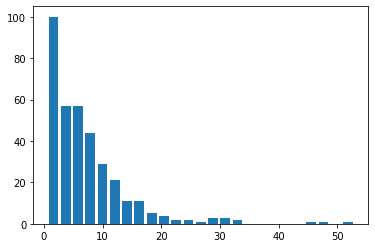

In [30]:
import matplotlib.pyplot as pyplot

num_bins = 25
df = pd.read_csv(os.path.join(datadir, "actors.csv"))
val_list = list(df['popularity'])
bin_values = myhistogram(val_list, num_bins)

interval = (max(val_list) - min(val_list)) / num_bins
x_values = [min(val_list) + (i * interval) + interval/2 for i in range(bins)]
pyplot.bar(x_values, bin_values, width=(0.8 * interval))
pyplot.show()

**Q** In the following cell, **interpret** the histogram, describing why you see high bars where you see them, why you see low bars where you see them, the meaning of the y axis, and the meaning of the x axis.

It shows how many actors fall into a certain range of popularity. So the higer the bar, the more actors that fall into that popularity. So a lot of actors fall into the lower popularity while less actors are more popular.

The `pyplot` package in the `matplotlib` module has its own algorithm for computing and displaying a histogram based only on the value list, `popularity_values` in this case. The next cell simply demonstrates this shortcut.

Note that the x axis of the histogram generated by `matplotlib` is not the bin number like the histogram we created by the represents the range of values for `popularity_values`.

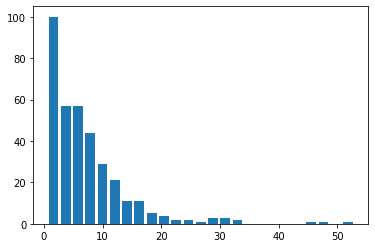

In [31]:
# This cell relies on the global popularity_values that was to be computed in Step 1
df = pd.read_csv(os.path.join(datadir,"actors.csv"))
val_list = list(df['popularity'])
pyplot.hist(val_list, bins=25, rwidth=0.8)
pyplot.show()

### Part 2: Movie Popularity vs. Vote Average Scatterplot

A scatter plot allows us to see, for two metrics, how they might relate to one another.  We use a Y axis that corresponds to the values on one metric, and an X axis that corresponds to the value of the other metric.  If both axis go from the metrics small values to high values, then if two metrics are positively correlated, we would expect to see the "dots" of the scatter plot rising in the plot from left to right.

In our movies data, we have two metrics, the `popularity` of the movie (as determined by an algorithm of the folks at TMDb), and the `vote_average`, as determined by the set of people who rate and vote on the movie.  One could ask the simple question of whether the popularity of a movie has a positive correlation with its vote average.  Note that we are just exploring the data, and are not performing the statistical analysis to quatify a correlation.

For this, we only need to obtain the two lists for the columns for polularity and for vote average.  We can then use the `matplotlib` scatter plot functionality.

**Step 1** In the following cell, define a function to obtain **and return** the two vectors of data corresponding to the popularity and the `vote_average` metrics.  You can call the function whatever you like.  It should have parameters for a data directory and a file name, and should return the two vectors of numeric values.

You have two main choices in how you implement this function.  It could use the xml version of the movies data, and perform XML and/or XPath operations to obtain the two vectors, or it could use the CSV version of the movies data produced from the work in your other notebook.

After defining the function, you should invoke it and assign the results to `poplist` and to `votelist` for use in the scatter plot of step 2.

In [32]:
def popAndVote(datadir, filename):
    '''
    popAndVote creates two list corresponding with the movies.csv file, and returns them as two lists of data.
    If the file is not found, then the function returns nothing
    
    parameters:
        datadir: The data directory where the file is located
        filename: The name of the file being converted; must be a csv and contains popularity and vote_average
        
    returns:
        pop: A list consisting of the popularity column from filename
        vote: A list consisting of the vote_average column from filename
    '''
    if not os.path.isfile(os.path.join(datadir, filename)):
        return None, None
    data = pd.read_csv(os.path.join(datadir, filename))
    pop = list(data['popularity'])
    vote = list(data['vote_average'])
    return pop, vote

poplist, votelist = popAndVote(datadir, "movies.csv")
print(poplist)
print(votelist)

[5726.5019999999995, 3172.173, 2504.228, 2333.41, 2010.4, 1229.877, 1189.271, 1140.524, 1119.721, 1022.12, 953.755, 907.2760000000001, 826.7230000000001, 823.202, 801.262, 773.475, 770.7689999999999, 763.922, 760.3510000000001, 678.765, 666.168, 663.812, 661.9780000000001, 641.38, 612.322, 585.668, 569.364, 558.599, 509.16900000000004, 487.70599999999996, 478.074, 458.075, 447.186, 440.01, 431.881, 429.233, 424.228, 423.17199999999997, 421.30800000000005, 420.082, 407.369, 404.54, 404.191, 400.36800000000005, 393.13300000000004, 390.889, 371.199, 368.25, 366.675, 356.173, 349.532, 343.63800000000003, 339.13199999999995, 331.645, 325.607, 322.246, 310.432, 300.426, 296.816, 294.23900000000003, 286.553, 283.375, 282.433, 282.24]
[8.5, 7.6, 7.1, 7.3, 6.9, 6.5, 6.5, 6.4, 5.1, 4.5, 5.3, 6.1, 7.1, 8.3, 7.3, 6.7, 7.6, 8.4, 6.9, 5.6, 7.3, 0.0, 8.0, 6.6, 7.5, 8.3, 7.2, 6.0, 6.6, 6.6, 5.8, 8.2, 6.9, 6.6, 7.6, 5.5, 5.8, 6.9, 7.4, 8.3, 9.6, 5.5, 6.3, 6.9, 7.8, 7.5, 6.7, 7.0, 6.9, 6.8, 6.2, 6.8, 7.

In [33]:
assert isinstance(poplist, list)
assert isinstance(votelist, list)
assert len(poplist) == len(votelist)

**Step 2** The `pyplot.scatter()` function behaves similarly to the `pyplot.bar()` function demonstrated above.  The first two arguments are the two vectors to be used as the x and y coordinates of the dots to be plotted in the scatter plot.  Then the `pyplot.show()` function needs to be invoked to actually output the plot to the screen.

Before the `show()` operation, you should also set the title of the plot to an apporpriate string, and should label the x and y axis appropriately.

Following are references to the functions:

- [`pyplot.scatter`](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html)
- [`pyplot.title`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html)
- [`pyplot.xlabel`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html)
- [`pyplot.ylabel`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html)

In the code cell below (and permitted to be global steps as opposed to abstracted into a function), present the scatter plot for popularity versus vote average.

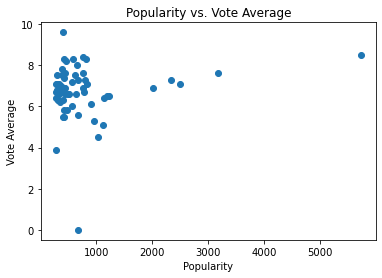

In [34]:
pyplot.scatter(x = poplist, y = votelist)
pyplot.title("Popularity vs. Vote Average")
pyplot.xlabel("Popularity")
pyplot.ylabel("Vote Average")
pyplot.show()

**Step 3** Interpret the scatter plot, paying attention to talking about the x axis, y axis, and why you see the relationship you do for the correspondence between x values and y values. Is there another visualization that would be better at showing the distribution of values *for a given vote average*?  Or could you modify the scatter plot and how it is constructed to gain more insight into a possible correlation?

This is a scatter plot of the popularity vs the vote average. So its the critiques rating on the movies vs the populations view on the movie and we can see that generally that the vote average is higher than the popularity (since most of points are in the top left of the graph). If we either changed the graph to a bar graph or took out the extreme outliers, I think we could get a better view on the popularity v vote average.